<h2>Market Study - Food Industry Exports</h2>

<a href="https://openclassrooms.com/en/" >Openclassrooms</a>, Data Analyst Course
<br>Project 5 - Michael Orange

<hr>

A company in the food industry specialized in chicken is looking at expanding worldwide. All countries are considered. 
<br>The main objective is to provide the company with data ensuring it will collaborate with the most promising export market countries. 

Grouping countries in 'clusters' based on their similarity is required. 
<br>Default variables are: 
- country population, 
- population growth, 
- calory supply per capita and protein supply per capita, 
- prevalence of animal proteins in the mix. 

Additional relevant variable might be included (ex. GDP per capita)

<hr>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

import scipy.cluster.hierarchy as hierarchy

from sklearn import preprocessing
from sklearn import decomposition

from display_pca import *

<h2>Import Dataset and Selecting variables</h2>

In [2]:
#import 
data_country = pd.read_csv("data/output/data_country.csv")
data_country

,country,domestic_supply_poultry_tons,euro_union,food_supply_kcalcapitaday,gdp_growth,gdp_percapita_usd,growth_import_poultry,growth_prev_protein_animal,growth_supply_poultry,import_chicken_quantity_tons,...,political_stability_index,pop_growth,pop_thousand,prevalence_imports_poultry_supply,prevalence_prod_poultry_supply,prevalence_protein_animal,production_poultry_tons,protein_supply_gcapitaday,growth_import_chicken_qty,price_import_chicken_usd_tons
0,Afghanistan,131000.0,Outside EU,58.26,-5.206857,468.297893,9.090909,3093.076604,7.377049,70001.0,...,-2.78,12.477767,36296.113,36.641221,63.358779,19.523017,83000.0,54.09,64.086637,1234.310938
1,Albania,97000.0,Outside EU,111.37,7.818559,3347.701760,-1.538462,3076.113231,8.988764,40034.0,...,0.40,-0.675703,2884.169,65.979381,39.175258,55.497908,38000.0,119.50,66.669442,1314.332817
2,Algeria,667000.0,Outside EU,91.92,-7.348644,3264.338962,4.724409,3606.422327,4.381847,1991.0,...,-0.96,8.518733,41389.189,99.700150,0.299850,27.679052,2000.0,92.85,-26.774549,12734.304370
3,Angola,347000.0,Outside EU,57.27,-15.509934,2805.692595,34.285714,3649.891485,-13.466334,267388.0,...,-0.29,14.610305,29816.766,13.544669,86.455331,30.449251,300000.0,54.09,-22.429454,1014.503269
4,Antigua and Barbuda,7000.0,Outside EU,83.49,15.033876,10549.721325,0.000000,2746.800496,0.000000,6455.0,...,0.76,4.272477,95.426,0.000000,100.000000,66.605052,7000.0,81.15,9.965928,1979.705655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Venezuela (Bolivarian Republic of),790000.0,Outside EU,72.96,-38.559352,6042.349852,-32.088889,2558.652576,-43.852168,25033.0,...,-1.18,-1.271131,29402.484,96.708861,3.164557,45.115453,25000.0,56.30,-91.089620,2464.027484
168,Viet Nam,1740000.0,Outside EU,81.61,23.679433,1619.296641,43.422354,3767.681966,15.308151,363681.0,...,0.31,4.240161,94600.648,83.333333,16.954023,40.875264,295000.0,90.03,-30.725185,1082.748343
169,Yemen,312000.0,Outside EU,58.90,-49.953849,515.814155,6.363636,2886.565840,-5.167173,77952.0,...,-2.96,10.687948,27834.819,75.000000,25.000000,20.060105,78000.0,53.24,-28.257989,1554.674672
170,Zambia,111000.0,Outside EU,55.22,-3.626393,1115.460621,0.000000,4202.406169,8.823529,12070.0,...,0.11,12.910256,16853.599,90.990991,10.810811,19.776498,12000.0,59.06,669.279796,921.043911


In [3]:
#data with only the variables for PCA
data_pca = pd.read_csv("data/output/data_pca.csv")
data_pca.set_index(['country'], inplace=True)

In [4]:
data_pca

,food_supply_kcalcapitaday,gdp_growth,gdp_percapita_usd,growth_prev_protein_animal,growth_import_poultry,growth_supply_poultry,political_stability_index,pop_growth,prevalence_imports_poultry_supply,prevalence_prod_poultry_supply,prevalence_protein_animal,protein_supply_gcapitaday,growth_import_chicken_qty,price_import_chicken_usd_tons
country,,,,,,,,,,,,,,
Afghanistan,58.26,-5.206857,468.297893,3093.076604,9.090909,7.377049,-2.78,12.477767,36.641221,63.358779,19.523017,54.09,64.086637,1234.310938
Albania,111.37,7.818559,3347.701760,3076.113231,-1.538462,8.988764,0.40,-0.675703,65.979381,39.175258,55.497908,119.50,66.669442,1314.332817
Algeria,91.92,-7.348644,3264.338962,3606.422327,4.724409,4.381847,-0.96,8.518733,99.700150,0.299850,27.679052,92.85,-26.774549,12734.304370
Angola,57.27,-15.509934,2805.692595,3649.891485,34.285714,-13.466334,-0.29,14.610305,13.544669,86.455331,30.449251,54.09,-22.429454,1014.503269
Antigua and Barbuda,83.49,15.033876,10549.721325,2746.800496,0.000000,0.000000,0.76,4.272477,0.000000,100.000000,66.605052,81.15,9.965928,1979.705655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),72.96,-38.559352,6042.349852,2558.652576,-32.088889,-43.852168,-1.18,-1.271131,96.708861,3.164557,45.115453,56.30,-91.089620,2464.027484
Viet Nam,81.61,23.679433,1619.296641,3767.681966,43.422354,15.308151,0.31,4.240161,83.333333,16.954023,40.875264,90.03,-30.725185,1082.748343
Yemen,58.90,-49.953849,515.814155,2886.565840,6.363636,-5.167173,-2.96,10.687948,75.000000,25.000000,20.060105,53.24,-28.257989,1554.674672


In [5]:
#sub dataframe of data_pca with only data related to poultry/chicken
sub_data_pca_poultry = pd.read_csv("data/output/data_pca_poultry.csv")
sub_data_pca_poultry.set_index(['country'], inplace=True)

In [6]:
#sub dataframe of data_pca with data NOT related to poultry/chicken
sub_data_pca_not_poultry = pd.read_csv("data/output/data_pca_not_poultry.csv")
sub_data_pca_not_poultry.set_index(['country'], inplace=True)

<h2>Overview of the data</h2>

In [7]:
data_pca.describe()

,food_supply_kcalcapitaday,gdp_growth,gdp_percapita_usd,growth_prev_protein_animal,growth_import_poultry,growth_supply_poultry,political_stability_index,pop_growth,prevalence_imports_poultry_supply,prevalence_prod_poultry_supply,prevalence_protein_animal,protein_supply_gcapitaday,growth_import_chicken_qty,price_import_chicken_usd_tons
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,81.177209,4.551843,10567.131253,3579.485627,11.903678,11.168975,-0.060000,5.475461,78.221461,36.859101,42.695622,81.192907,51.090804,3723.686569
std,20.047695,13.551503,14523.104601,760.376179,30.431913,24.855361,0.895993,5.016197,41.012101,42.093665,15.991917,20.199063,123.511499,6235.077120
min,37.660000,-49.953849,287.166959,1475.683628,-100.000000,-46.794872,-2.960000,-5.434483,0.000000,0.000000,8.912249,39.910000,-98.310495,374.399415
25%,64.175000,-0.959319,1588.501797,3129.790758,0.000000,0.378788,-0.612500,1.910891,50.000000,3.216436,29.060776,64.212500,-4.520335,1390.467770
50%,81.250000,4.744072,4467.101922,3408.214188,11.186744,7.392228,0.030000,4.755661,89.788156,20.006671,43.733922,81.390000,18.995624,1998.175606
75%,95.262500,12.191622,12088.189295,3901.446754,21.138204,18.202565,0.667500,9.093107,100.000000,61.993541,56.821064,96.445000,63.327431,3440.320574
max,133.060000,46.426591,81059.319125,6548.912638,234.782609,171.111111,1.590000,23.935417,243.139842,241.891892,73.331883,141.340000,902.263374,56606.435644


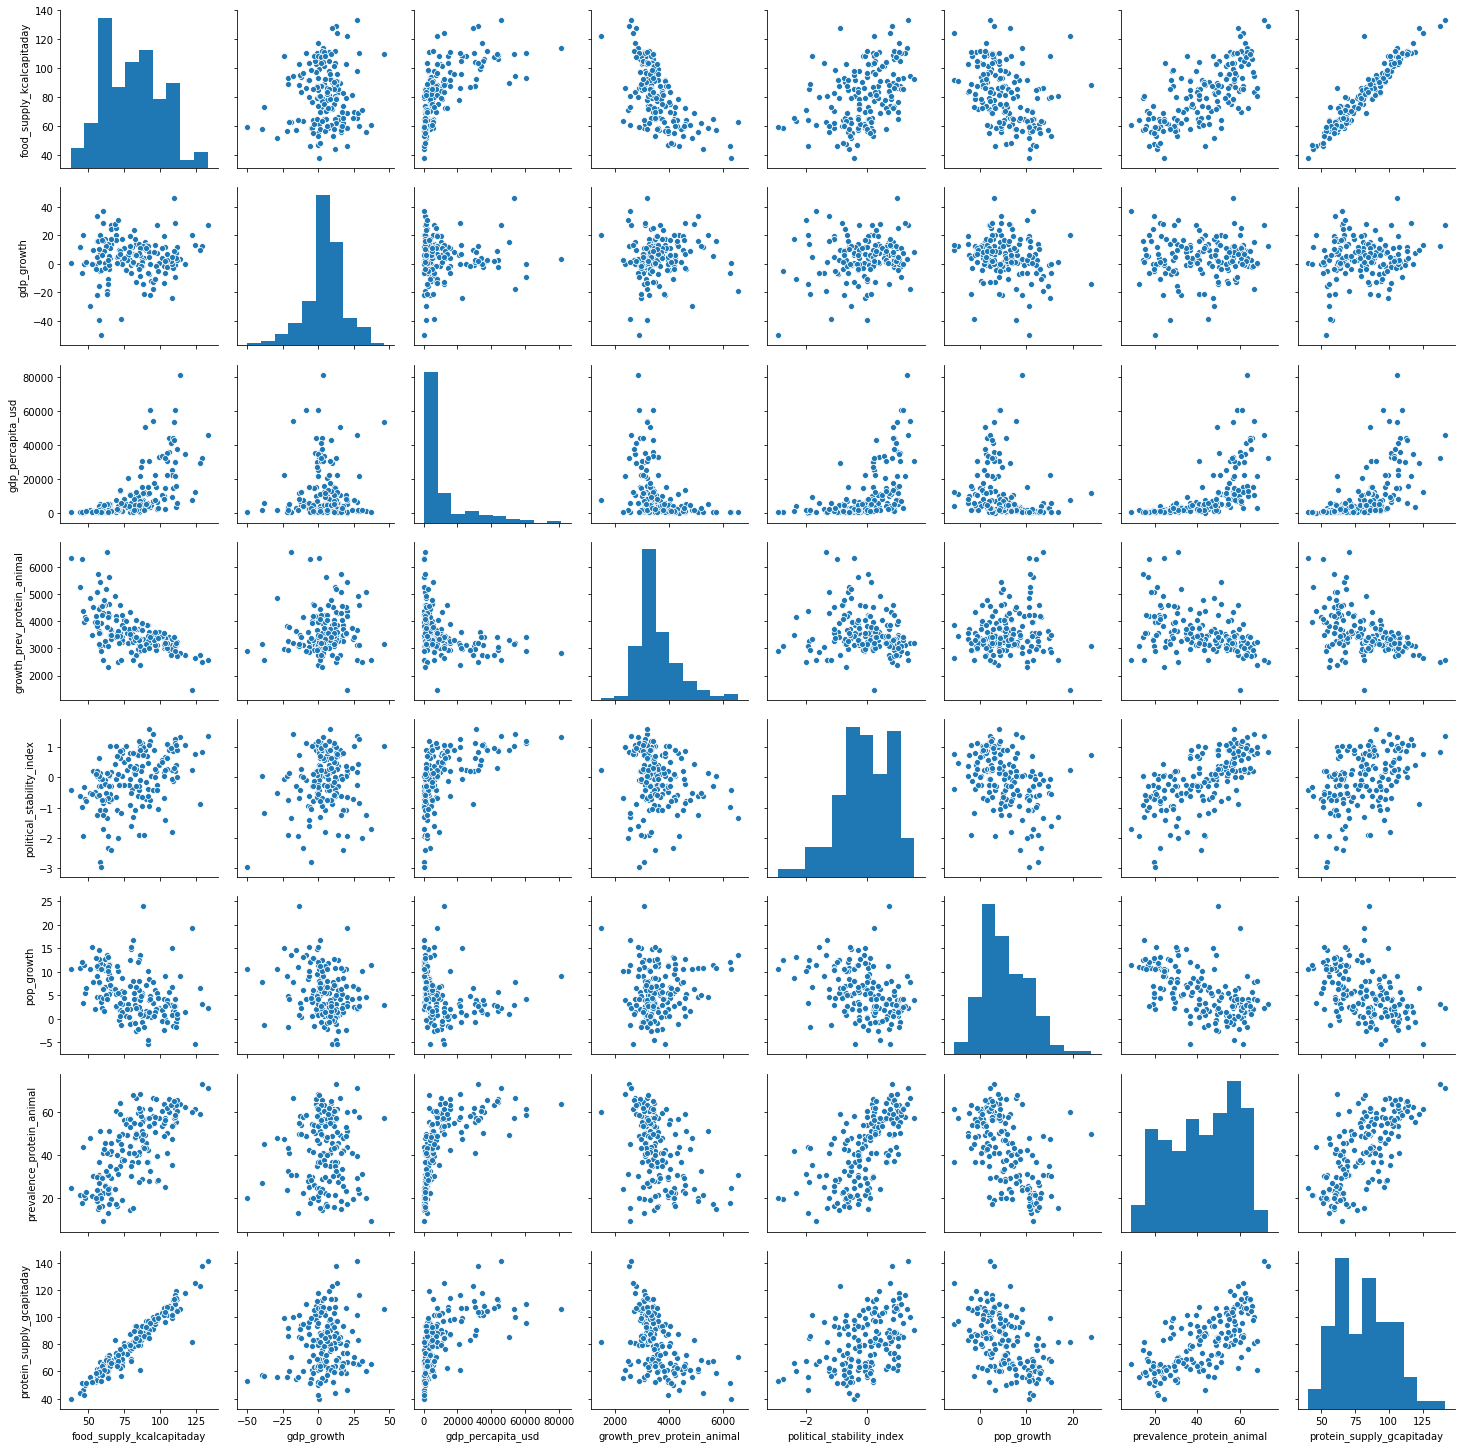

In [8]:
sns.pairplot(sub_data_pca_not_poultry)

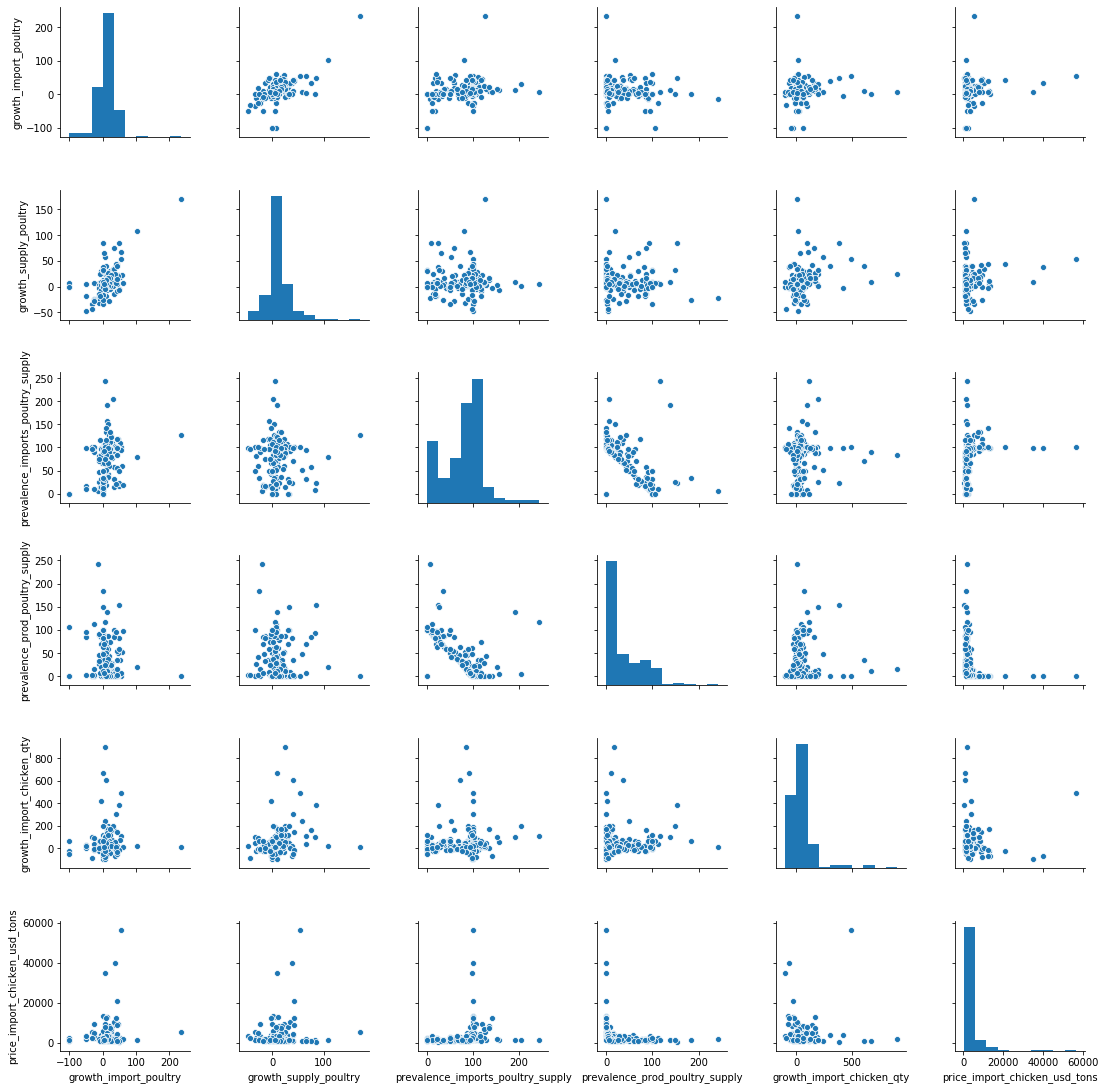

In [9]:
sns.pairplot(sub_data_pca_poultry)

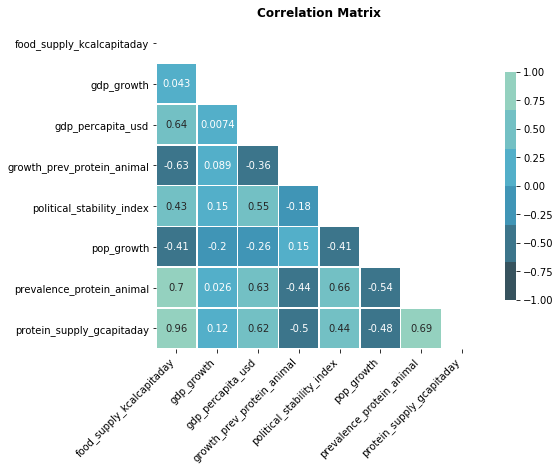

In [10]:
# Compute the correlation matrix
corr = sub_data_pca_not_poultry.corr()
# Display correlation matrix
display_corr_matrix(corr)


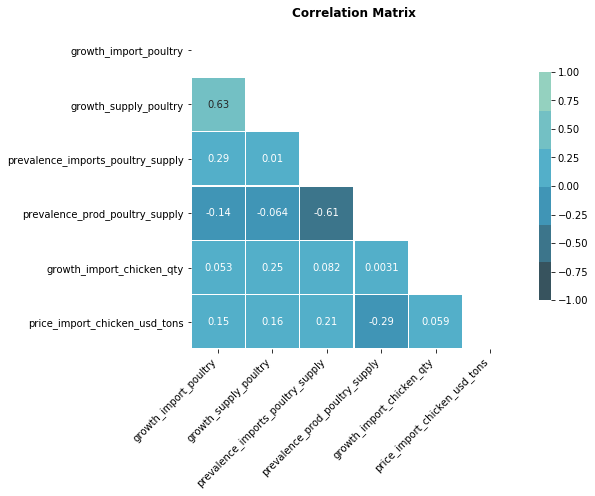

In [11]:
# Compute the correlation matrix
corr = sub_data_pca_poultry.corr()
# Display correlation matrix
display_corr_matrix(corr)


<h2>Transform data (Normalization)</h2>

In [12]:
X = data_pca.values
names = data_pca.index
features = data_pca.columns
print(X.shape)

(172, 14)


In [13]:
#number of observations
n = X.shape[0]
# number of variables
p = X.shape[1]

In [14]:
# Standardization and reduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

<h2>Principal Component Analysis</h2>

In [15]:
# PCA
pca = decomposition.PCA(n_components=p)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<h3>Number of components</h3>

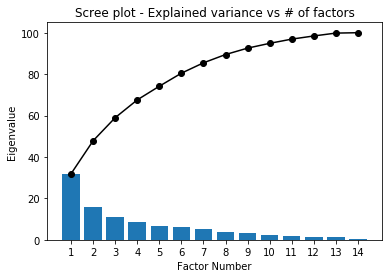

In [16]:
# Scree plot
display_scree_plot(pca)

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis).

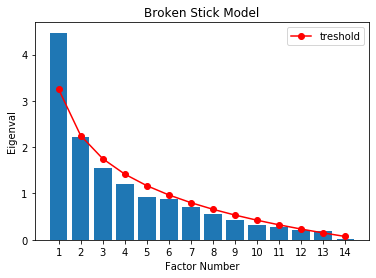

In [17]:
display_broken_sticks_plot(pca, n)

In [18]:
n_comp = 3

In [19]:
# PCA
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

X_projected = pca.transform(X_scaled)

<h2>Clustering after PCA</h2>

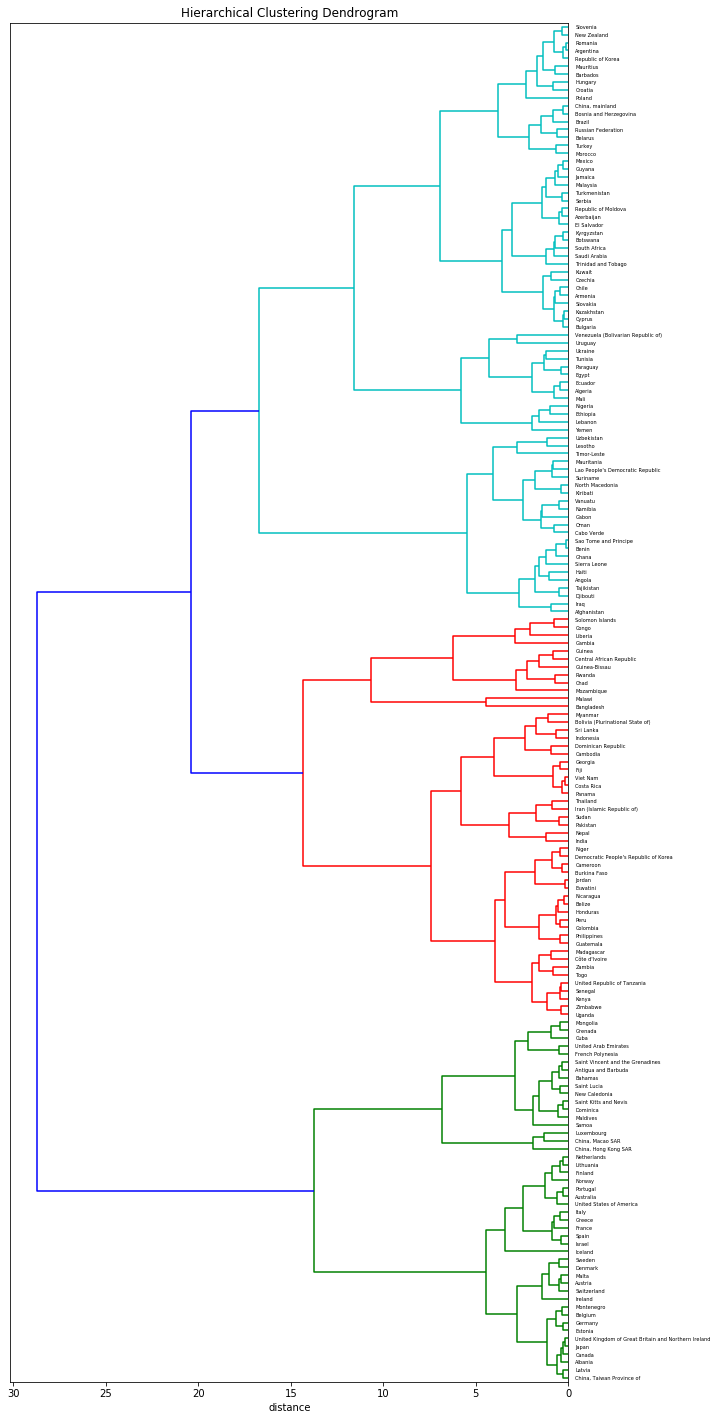

In [20]:
# Clustering hiérarchique
Z = hierarchy.linkage(X_projected, 'ward')

#dendogram
plot_dendrogram(Z, names)

In [21]:
num_clusters = 9

In [22]:
clusters = hierarchy.fcluster(Z, num_clusters, criterion='maxclust')

In [23]:
df_cluster = pd.DataFrame(clusters)
df_cluster.columns = ['cluster']
df_cluster.index=names

In [24]:
df_cluster.reset_index().pivot_table(index='cluster', values='country', aggfunc=len)

,country
cluster,
1,29
2,17
3,22
4,17
5,2
6,10
7,23
8,13
9,39


<h2>Correlation circles and Synthetic variables</h2>

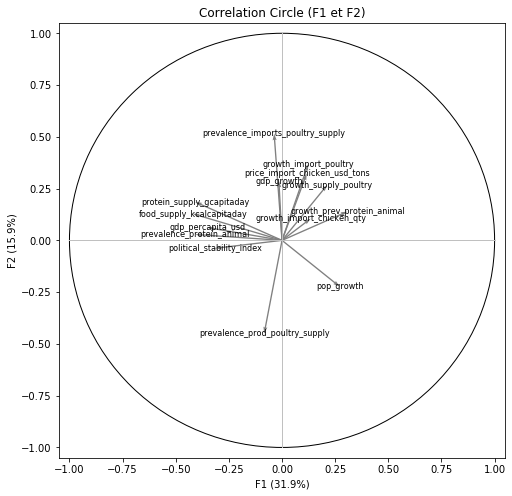

In [25]:
# Correlation Circle F1 and F2
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

F1: Level of development
<br>F2 : Population growth

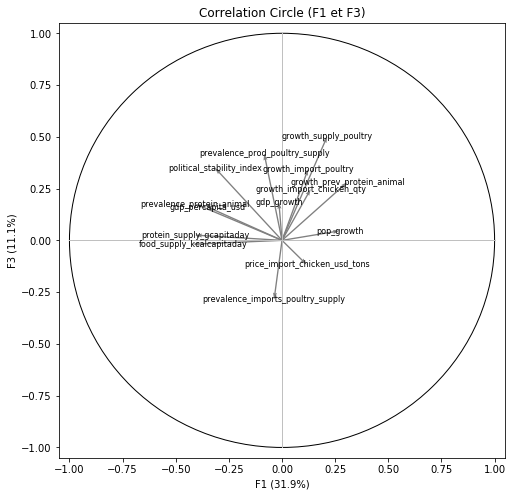

In [26]:
# Correlation Circle F1 and F3
display_circles(pcs, n_comp, pca, [(0,2)], labels = np.array(features))

F1: Level of development
<br>F2 : Consumption of animals per capita

In [27]:
# data frame with new synthetic variables
df_X_projected = pd.DataFrame(X_projected, index=names, columns=['F'+str(i+1) for i in range(n_comp)])
df_X_projected = pd.concat([df_X_projected, df_cluster], axis=1)
df_X_projected.reset_index(inplace=True, col_level=-1)
first_col = df_X_projected.pop('country')
df_X_projected.insert(len(df_X_projected.columns), 'country', first_col)
df_X_projected

,F1,F2,F3,cluster,country
0,2.928309,-1.976171,-1.176208,7,Afghanistan
1,-2.360348,0.292638,0.050380,1,Albania
2,0.655033,0.675802,-1.780391,8,Algeria
3,1.886734,-2.815703,0.117243,7,Angola
4,-1.639453,-1.908572,1.169909,2,Antigua and Barbuda
...,...,...,...,...,...
167,-0.393801,-1.772996,-3.860777,8,Venezuela (Bolivarian Republic of)
168,-0.007129,1.022089,0.448916,4,Viet Nam
169,2.676583,-2.217277,-3.074625,8,Yemen
170,3.009943,-0.197405,0.656846,3,Zambia


In [28]:
# composition of the synthetic variables

F_composition = {}
for k in range(n_comp):
    F_composition['F{}'.format(k+1)] = {}
    for n in range(p):
        F_composition['F{}'.format(k+1)].update({data_pca.columns[n]: pca.components_[k][n]})
pd.DataFrame(F_composition)

,F1,F2,F3
food_supply_kcalcapitaday,-0.419307,0.128212,-0.018381
gdp_growth,-0.014782,0.287663,0.184643
gdp_percapita_usd,-0.350850,0.061889,0.161427
growth_prev_protein_animal,0.307683,0.139273,0.281219
growth_import_poultry,0.123198,0.368264,0.345201
growth_supply_poultry,0.212919,0.267759,0.502902
political_stability_index,-0.315234,-0.038213,0.349861
pop_growth,0.271547,-0.223626,0.046092
prevalence_imports_poultry_supply,-0.037182,0.515587,-0.285177
prevalence_prod_poultry_supply,-0.084022,-0.450276,0.419351


<h2>Individuals factor map</h2>

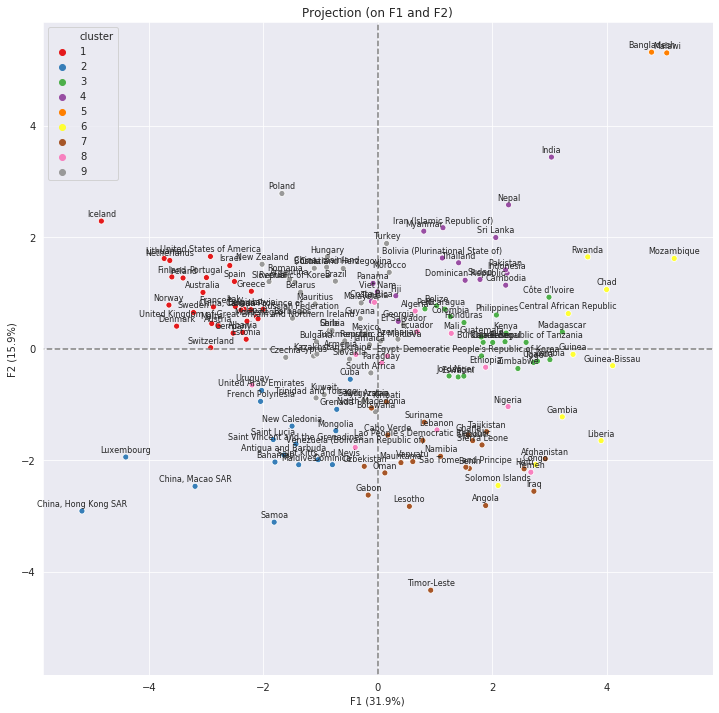

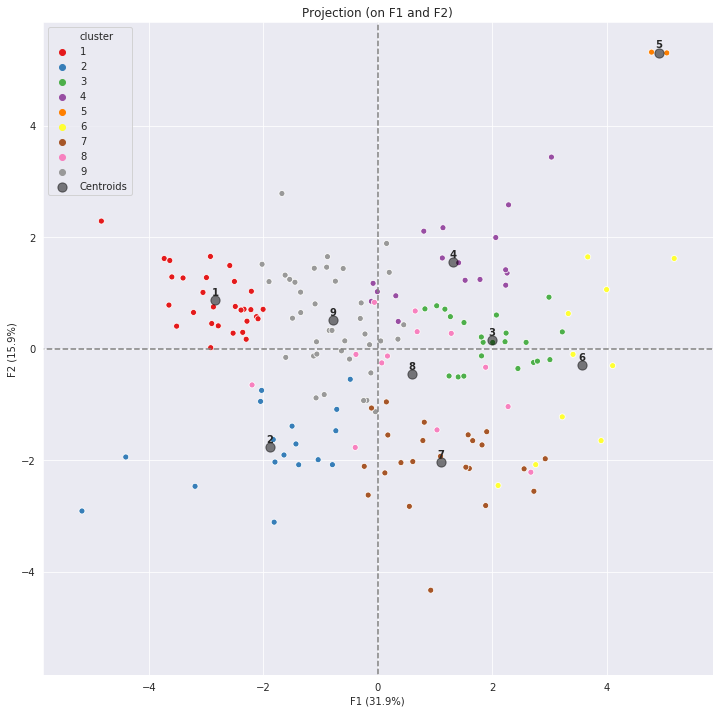

In [29]:
display_factorial_planes(X_projected, n_comp, pca,[(0,1)], labels=names, illustrative_var=df_X_projected.cluster)
display_factorial_planes(X_projected, n_comp, pca,[(0,1)], illustrative_var=df_X_projected.cluster)

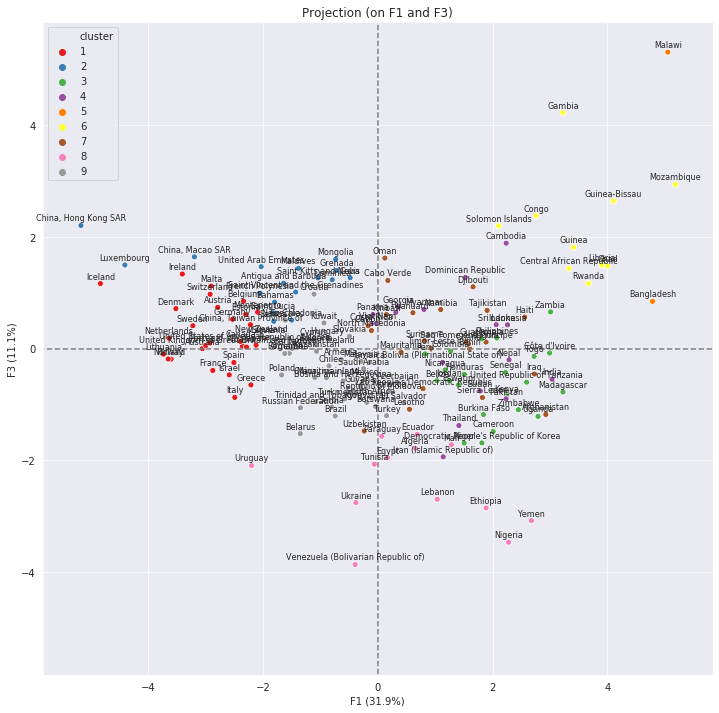

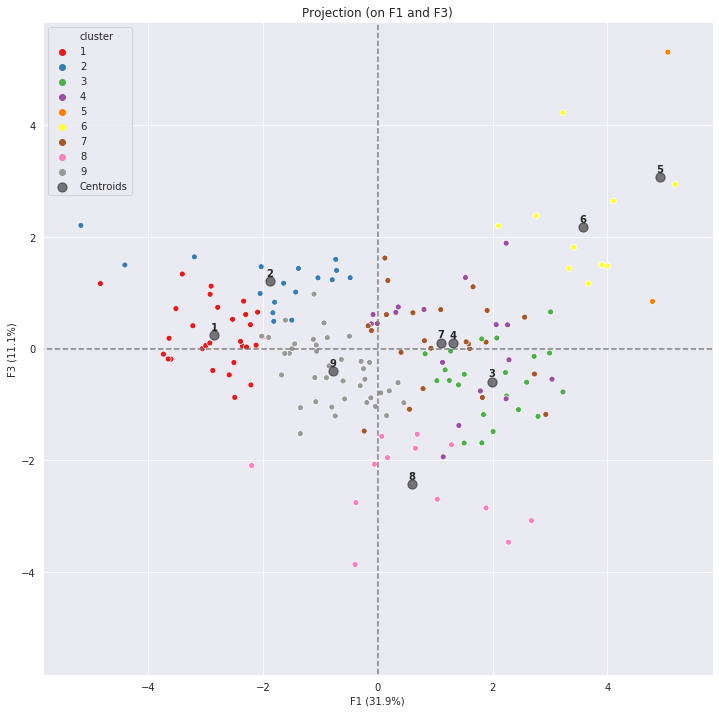

In [30]:
display_factorial_planes(X_projected, n_comp, pca,[(0,2)], labels=names, illustrative_var=df_X_projected.cluster)
display_factorial_planes(X_projected, n_comp, pca,[(0,2)], illustrative_var=df_X_projected.cluster)

<h2>Cluster Analysis</h2>

In [31]:
data_country = pd.merge(data_country,df_X_projected[['country', 'cluster']])
data_country.pivot_table(index='cluster', values=data_country.columns[1:-1], aggfunc=np.mean)

,domestic_supply_poultry_tons,food_supply_kcalcapitaday,gdp_growth,gdp_percapita_usd,growth_import_chicken_qty,growth_import_poultry,growth_prev_protein_animal,growth_supply_poultry,import_chicken_quantity_tons,import_poultry_tons,political_stability_index,pop_growth,pop_thousand,prevalence_imports_poultry_supply,prevalence_prod_poultry_supply,prevalence_protein_animal,price_import_chicken_usd_tons,production_poultry_tons,protein_supply_gcapitaday
cluster,,,,,,,,,,,,,,,,,,,
1,1.772241e+06,107.732759,7.042265,31753.138165,29.028086,14.135497,3098.345535,5.409426,273228.965517,1.917517e+06,0.675172,1.412564,33639.482069,102.750786,36.807269,59.630615,2750.330265,251827.586207,108.751724
2,9.529412e+04,92.048235,5.942865,19359.225808,19.565665,-6.969893,3051.496108,6.664157,117663.000000,1.747059e+04,0.833529,4.612199,2041.670882,12.434834,99.967153,60.313783,1743.560513,121588.235294,89.079412
3,4.208182e+05,63.310909,5.568916,1681.258890,95.939586,13.836672,3817.910334,13.714899,29294.454545,3.923636e+05,-0.595455,9.551791,25936.268000,94.021355,7.483458,26.538311,3505.235351,30272.727273,63.334545
4,1.528412e+06,70.434706,17.679064,3356.340957,83.617887,30.827620,4021.776652,26.510893,30164.470588,1.551824e+06,-0.445882,4.513724,132372.541000,98.204715,7.383402,38.191973,9787.723028,28176.470588,73.541176
5,5.325000e+05,60.195000,19.758918,643.325330,250.109221,144.352089,5356.925869,112.598039,402.000000,5.480000e+05,-0.760000,8.045929,88677.810000,113.061732,0.000000,18.350903,31055.717822,0.000000,64.100000
6,5.080000e+04,51.786000,1.159137,676.872490,198.686421,31.849415,5306.582394,60.939636,24267.400000,2.730000e+04,-0.637000,10.681712,8680.126800,54.614481,67.946247,27.469769,1881.548002,26600.000000,54.586000
7,1.085217e+05,67.485652,-2.119743,2533.239561,20.138276,-2.021864,3686.056803,1.977912,84975.086957,2.339130e+04,-0.178261,9.085861,10074.686609,28.261670,77.344222,31.662608,1355.810027,87217.391304,66.419565
8,5.556154e+05,79.016154,-6.765395,3524.607780,-6.626780,-13.466027,3076.990762,-16.068455,27079.846154,5.601538e+05,-1.193077,7.224806,46206.482231,97.598895,5.213059,31.893368,5561.050419,28384.615385,75.345385
9,2.651590e+06,88.860256,3.594803,9267.011578,31.202504,13.894307,3410.768741,5.828004,119225.333333,2.773000e+06,0.105385,2.813552,62590.727590,98.305233,19.400249,48.760646,2645.213143,122769.230769,89.032564


In [32]:
# data by clusters (group1, group2, etc.)
for n in range(num_clusters):
    group = 'group{}'.format(n)
    vars()[group] = data_country.loc[data_country['cluster']==n]   

In [33]:
group1.describe()

,domestic_supply_poultry_tons,food_supply_kcalcapitaday,gdp_growth,gdp_percapita_usd,growth_import_poultry,growth_prev_protein_animal,growth_supply_poultry,import_chicken_quantity_tons,import_poultry_tons,political_stability_index,pop_growth,pop_thousand,prevalence_imports_poultry_supply,prevalence_prod_poultry_supply,prevalence_protein_animal,production_poultry_tons,protein_supply_gcapitaday,growth_import_chicken_qty,price_import_chicken_usd_tons,cluster
count,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01,29.000000,29.000000,29.000000,29.0
mean,1.772241e+06,107.732759,7.042265,31753.138165,14.135497,3098.345535,5.409426,2.732290e+05,1.917517e+06,0.675172,1.412564,33639.482069,102.750786,36.807269,59.630615,2.518276e+05,108.751724,29.028086,2750.330265,1.0
std,4.516627e+06,10.173211,11.307159,15379.312042,10.592734,267.317966,6.108211,4.299775e+05,5.194583e+06,0.506886,2.686123,63827.543922,37.644767,32.791561,4.857344,3.590397e+05,11.055433,30.759920,1122.565046,0.0
min,1.400000e+04,87.650000,-8.831029,3347.701760,-1.538462,2585.194523,-8.823529,1.851000e+03,1.000000e+04,-0.880000,-5.434483,334.393000,50.000000,0.660432,49.539144,2.000000e+03,85.710000,-21.501274,1032.016255,1.0
25%,1.720000e+05,103.650000,0.096284,21764.292683,8.348031,2944.243164,1.793722,2.769000e+04,1.640000e+05,0.300000,0.024866,4753.279000,86.495177,11.744301,57.109028,3.000000e+04,104.070000,10.754579,1997.933490,1.0
50%,3.310000e+05,108.650000,2.907299,32988.016625,13.030888,3111.171492,5.263158,9.436200e+04,3.290000e+05,0.870000,1.669503,9904.896000,98.232323,30.447761,60.012950,1.020000e+05,107.290000,22.973571,2501.754095,1.0
75%,1.934000e+06,110.870000,11.469796,43018.296795,18.597561,3290.719674,8.491947,1.955420e+05,1.970000e+06,1.070000,2.982736,36732.095000,112.276786,50.000000,62.443746,2.370000e+05,113.610000,41.516227,3421.334050,1.0
max,2.437800e+07,133.060000,46.426591,60315.155240,43.043478,3603.148194,20.916031,1.715714e+06,2.823700e+07,1.370000,6.580704,325084.756000,243.139842,138.368580,71.388142,1.333000e+06,141.340000,111.202752,6031.298905,1.0


In [34]:
group5

,country,domestic_supply_poultry_tons,euro_union,food_supply_kcalcapitaday,gdp_growth,gdp_percapita_usd,growth_import_poultry,growth_prev_protein_animal,growth_supply_poultry,import_chicken_quantity_tons,...,pop_growth,pop_thousand,prevalence_imports_poultry_supply,prevalence_prod_poultry_supply,prevalence_protein_animal,production_poultry_tons,protein_supply_gcapitaday,growth_import_chicken_qty,price_import_chicken_usd_tons,cluster
11,Bangladesh,943000.0,Outside EU,55.86,33.821328,985.166938,53.921569,5087.792462,54.084967,404.0,...,4.532562,159685.424,99.893955,0.0,19.843906,0.0,60.22,494.117647,56606.435644,5
95,Malawi,122000.0,Outside EU,64.53,5.696508,301.483722,234.782609,5626.059277,171.111111,400.0,...,11.559296,17670.196,126.229508,0.0,16.857899,0.0,67.98,6.100796,5505.000000,5
